In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import xarray as xr
pylab.rcParams['figure.figsize'] = (16., 9.)
#%matplotlib inline
from utils import constants as cnst

In [1]:
cd ..

/home/ck/pythonWorkspace/proj_CEH


In [150]:
box = [-12, 12, 5, 20]
cut_file = xr.open_dataset(cnst.CP4_PATH + '/CLOVER//CP25hist/lw_out_PBLtop/lw_out_PBLtop_fullPL__A1hr_mean_ay488_25km_200208010030-200208302330.nc')
cut_file = cut_file.sel(longitude=slice(box[0], box[1]), latitude=slice(box[2], box[3]))

In [151]:
cut_file

<xarray.Dataset>
Dimensions:                  (latitude: 64, longitude: 68, time: 720)
Coordinates:
  * time                     (time) datetime64[ns] 2002-08-01T00:30:00 ... 2002-08-30T23:29:58
  * latitude                 (latitude) float32 5.0390625 ... 19.804688
  * longitude                (longitude) float32 -11.77832 ... 11.776337
    forecast_period          (time) timedelta64[ns] ...
    forecast_reference_time  datetime64[ns] ...
Data variables:
    lw_out_PBLtop            (time, latitude, longitude) float32 ...

In [152]:
res = cut_file.latitude.values[1::]-cut_file.latitude.values[0:-1]
print(res[0:2])
print(5000/(25*25))

[0.234375 0.234375]
8.0


In [153]:
da = cut_file['lw_out_PBLtop'][(cut_file['time.hour']==19) & (cut_file['time.month']==8) & (cut_file['time.day']==3)].squeeze()
print(da.time)

<xarray.DataArray 'time' ()>
array('2002-08-03T19:30:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time                     datetime64[ns] 2002-08-03T19:30:00
    forecast_period          timedelta64[ns] ...
    forecast_reference_time  datetime64[ns] ...
Attributes:
    axis:           T
    bounds:         time_bnds
    standard_name:  time


In [154]:
def olr_to_bt(olr):
    sigma = 5.670373e-8
    return ((olr/sigma)**0.25)-273.15

In [155]:
olr_to_bt(167)

-40.19276079682609

In [156]:
from scipy.ndimage.measurements import label
tthresh = -40
da.values = olr_to_bt(da.values)
#
# plt.figure()
# plt.hist(da.values.flatten())

da.values[da.values >= tthresh] = 0  # T threshold maskout
da.values[np.isnan(da.values)] = 0 # set ocean nans to 0

labels, numL = label(da.values)


u, inv = np.unique(labels, return_inverse=True)
n = np.bincount(inv)

goodinds = u[n >= 8]  # 51pix is 1000km2 ,258 for CP4 5000km2 # defines minimum MCS size e.g. 350 km2 = 39 pix at 3x3km res (258 pix at 4.4km is 5000km2) 52 pix is 1000km2 for cp4

In [157]:
goodinds

array([ 0, 10, 26, 31], dtype=int32)

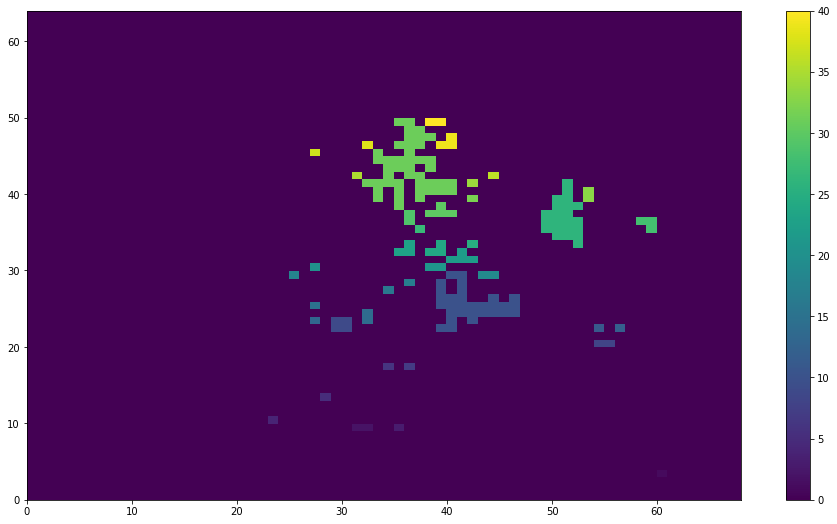

In [158]:
plt.figure()
plt.pcolormesh(labels)
plt.colorbar()

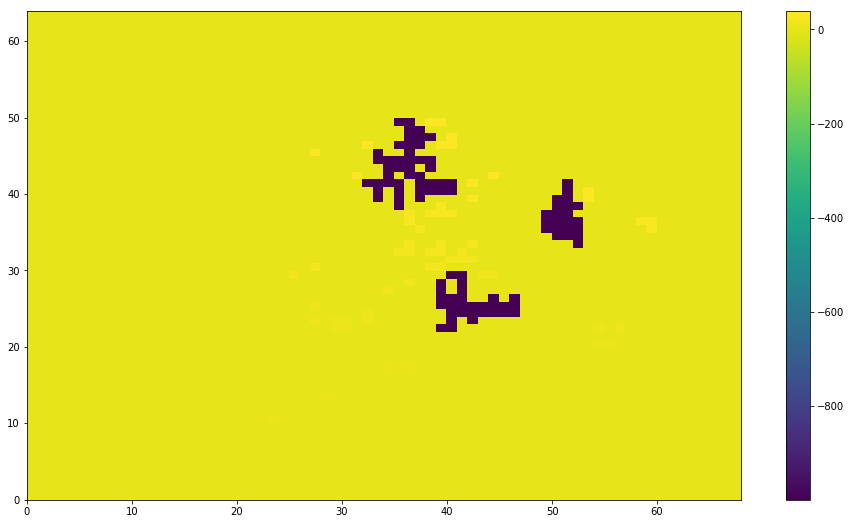

In [159]:
for gi in goodinds:
    if gi ==0:
        continue
    labels[labels==gi] = -999
plt.figure()
plt.pcolormesh(labels)
plt.colorbar()

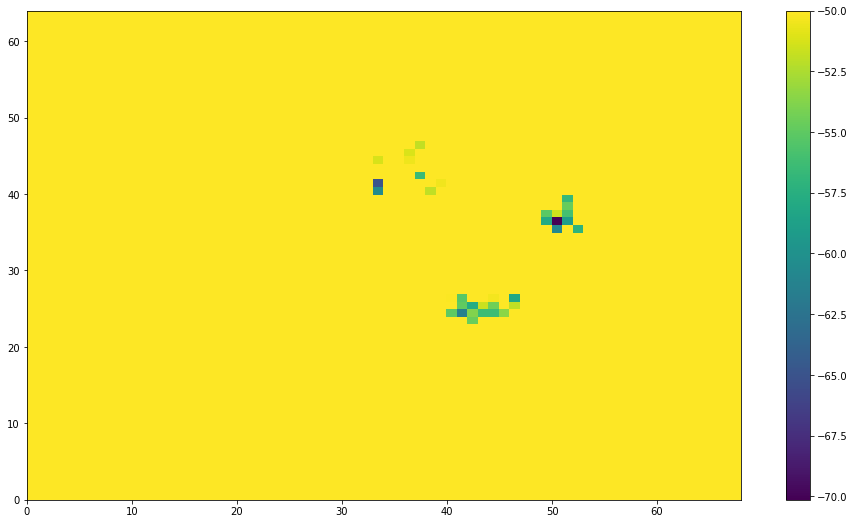

In [160]:
plt.figure()
plt.pcolormesh(da, vmax=-50)
#plt.contour(labels)
plt.colorbar()